In [144]:
import numpy as np
import sklearn
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import norm

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit, KFold, StratifiedKFold
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
Linear regression uses ordinary least squares method to minimise the errors and arrive at a best possible fit, while logistic regression uses maximum likelihood method to arrive at the solution.

## Credit card fraud detection
- Highly imbalanced data 

In [3]:
df = pd.read_csv('../data/credit_card/creditcard.csv')
print(df.shape)

(284807, 31)


### Explore data

- The mean of all the amounts is approx. USD 88
- No "Null" values
- Highly imbalanced data: Non-Fraud (99.83%) Fraud (0.17%)

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().sum().max() # No null value

0

No Frauds :  99.83 %
Frauds    :  0.17 %


Text(0.5, 1.0, 'Class Distributions')

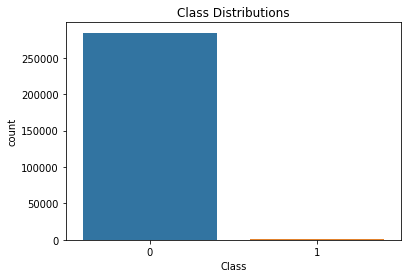

In [6]:
print(f'No Frauds : ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '%')
print(f'Frauds    : ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '%')
sns.countplot('Class', data=df)
plt.title('Class Distributions')

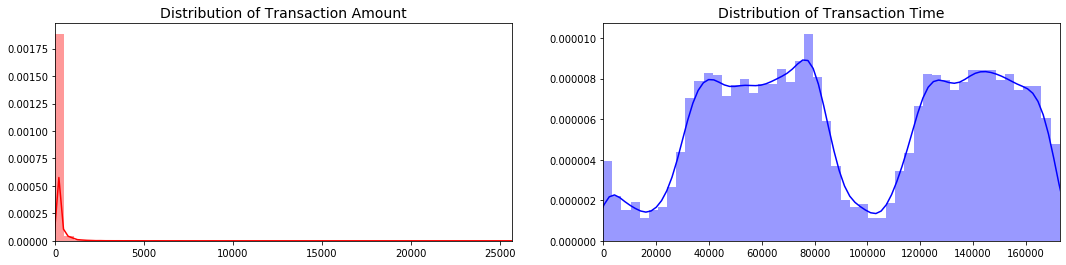

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [8]:
# Scale Amaount and Time features

# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.296653,1.034951
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986,1.034963
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096,1.034975
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.167680,1.034975


####  Splitting the Data

In [9]:
X = df.drop('Class', axis=1)
y = df['Class']

In [10]:
stratified = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [11]:
for train_index, test_index in stratified.split(X, y):
    Xtrain, Xtest = X.iloc[train_index].values, X.iloc[test_index].values
    ytrain, ytest = y.iloc[train_index].values, y.iloc[test_index].values

train_unique_label, train_counts_label = np.unique(ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(ytest, return_counts=True)

print('Label Distributions:')
print('train:', train_counts_label/ len(ytrain))
print('test: ', test_counts_label/ len(ytest))

Label Distributions:
train: [0.99827076 0.00172924]
test:  [0.99827952 0.00172048]


#### Random Under-Sampling
* removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


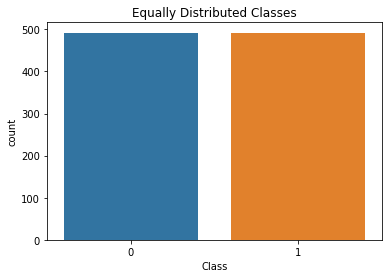

In [12]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df]).sample(frac=1, random_state=42)

print('Distribution of the Classes in the subsample dataset')
print(normal_distributed_df['Class'].value_counts()/len(normal_distributed_df))

sns.countplot('Class', data=normal_distributed_df)
plt.title('Equally Distributed Classes')
plt.show()

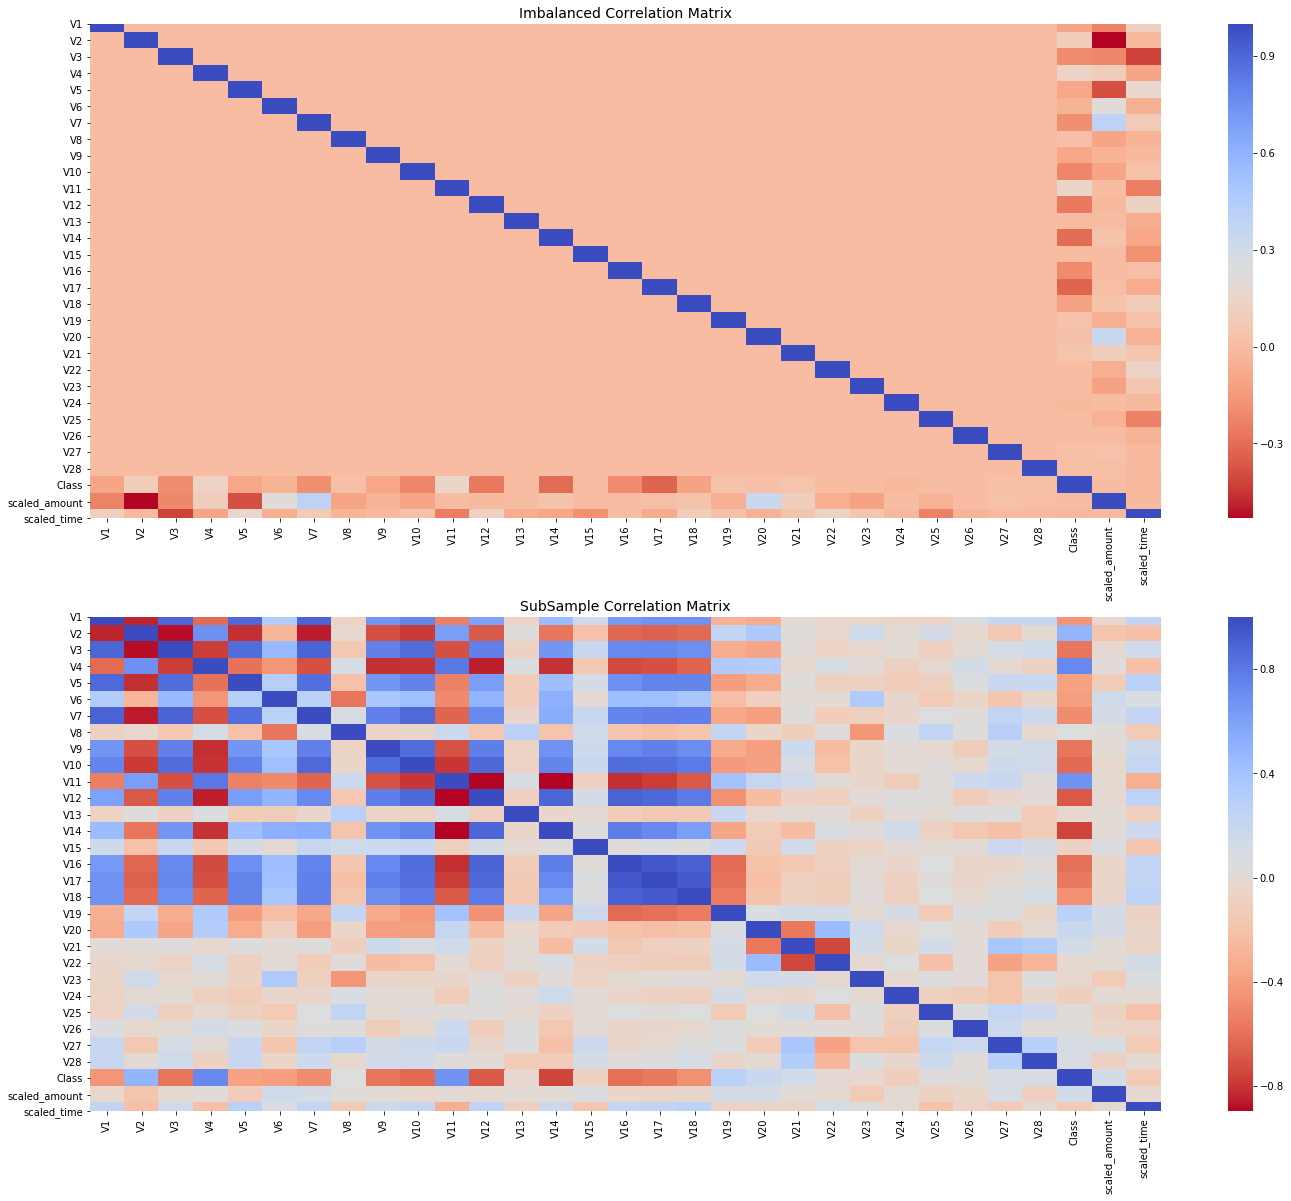

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

# Equally Distributed Classes
sub_sample_corr = normal_distributed_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', ax=ax2)
ax2.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

* Positive Correlations: V2, V4, V11, V19
* Negative Correlations: V14, V12, V10, V16

#### Anomaly Detection

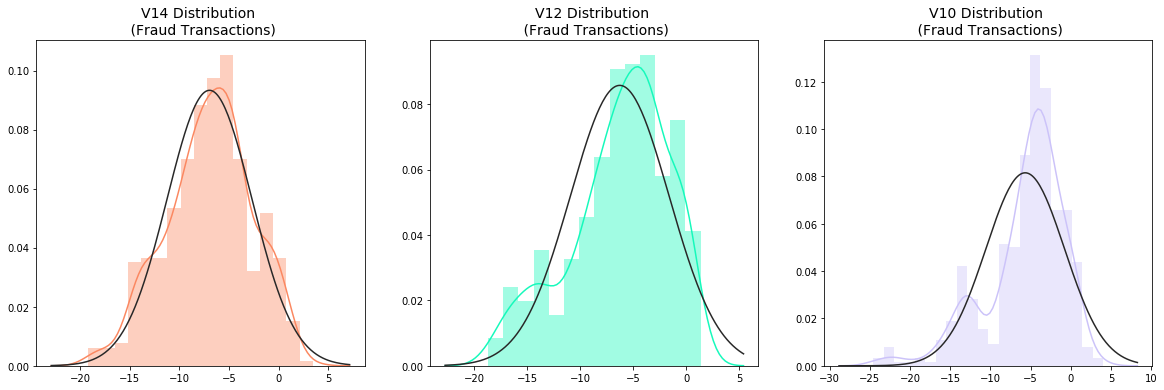

In [14]:
# Distribution plot
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = normal_distributed_df['V14'].loc[normal_distributed_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = normal_distributed_df['V12'].loc[normal_distributed_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#16F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = normal_distributed_df['V10'].loc[normal_distributed_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#CCC3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [15]:
# V14 Removing Outliers (Highest Negative Correlated with Labels)

v14_fraud = normal_distributed_df['V14'].loc[normal_distributed_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print(f'Quartile 25: {q25} | Quartile 75: {q75}')
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]

print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

normal_distributed_df = normal_distributed_df.drop(normal_distributed_df[(normal_distributed_df['V14'] > v14_upper) | 
                                                                         (normal_distributed_df['V14'] < v14_lower)].index)

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.049997689859396, -18.8220867423816, -19.2143254902614, -18.4937733551053]


In [16]:
# V12 removing outliers from fraud transactions

v12_fraud = normal_distributed_df['V12'].loc[normal_distributed_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
normal_distributed_df = normal_distributed_df.drop(normal_distributed_df[(normal_distributed_df['V12'] > v12_upper) | 
                                                          (normal_distributed_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(normal_distributed_df)))

V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.4311310279993, -18.683714633344298, -18.553697009645802, -18.047596570821604]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 975


In [17]:
# Removing outliers V10 Feature
v10_fraud = normal_distributed_df['V10'].loc[normal_distributed_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print(f'V10 Lower: {v10_lower} V10 Upper: {v10_upper}')
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
normal_distributed_df = normal_distributed_df.drop(normal_distributed_df[(normal_distributed_df['V10'] > v10_upper) | (normal_distributed_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(normal_distributed_df)))

V10 Lower: -14.89885463232024 V10 Upper: 4.920334958342141
V10 outliers: [-24.403184969972802, -15.124162814494698, -15.563791338730098, -15.2399619587112, -22.1870885620007, -15.2399619587112, -15.2318333653018, -17.141513641289198, -14.9246547735487, -18.9132433348732, -15.563791338730098, -20.949191554361104, -22.1870885620007, -22.1870885620007, -15.1237521803455, -18.2711681738888, -16.2556117491401, -24.5882624372475, -19.836148851696, -16.6496281595399, -16.3035376590131, -16.7460441053944, -16.6011969664137, -23.2282548357516, -22.1870885620007, -15.346098846877501, -14.9246547735487]
Feature V10 Outliers for Fraud Cases: 27
Number of Instances after outliers removal: 946


#### t-SNE, PCA, Truncated SVD

In [18]:
X = normal_distributed_df.drop('Class', axis=1)
y = normal_distributed_df['Class']


# T-SNE
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA 
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 8.7 s
PCA took 0.035 s
Truncated SVD took 0.0049 s


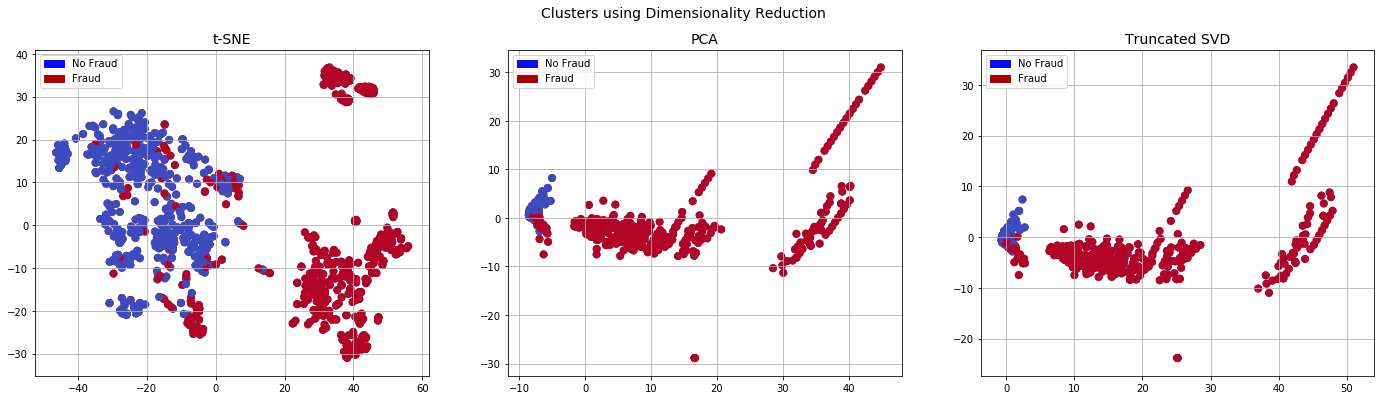

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

####  Classifier

In [20]:
X = normal_distributed_df.drop('Class', axis=1)
y = normal_distributed_df['Class']

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = X_train.values, y_train.values
X_test, y_test = X_test.values, y_test.values

In [21]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [22]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [23]:
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Library/

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

In [24]:
# KNN
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_
knears_neighbors

KNeighborsClassifier(n_neighbors=4)

In [25]:
# Support Vector
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_
svc

SVC(C=0.5, kernel='linear')

In [26]:
# DecisionTree 
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_
tree_clf

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [27]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.44%
Knears Neighbors Cross Validation Score 93.65%
Support Vector Classifier Cross Validation Score 94.58%
DecisionTree Classifier Cross Validation Score 93.12%


#### SMOTE (Synthetic Minority Over-sampling Technique)

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV

print('Length of X (train): {} | Length of y (train): {}'.format(len(Xtrain), len(ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(Xtest), len(ytest)))

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961


In [42]:
# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters

for train, test in stratified.split(Xtrain, ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    model = pipeline.fit(Xtrain[train], ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(Xtrain[test])
    
    accuracy_lst.append(pipeline.score(Xtrain[test], ytrain[test]))
    precision_lst.append(precision_score(ytrain[test], prediction))
    recall_lst.append(recall_score(ytrain[test], prediction))
    f1_lst.append(f1_score(ytrain[test], prediction))
    auc_lst.append(roc_auc_score(ytrain[test], prediction))

### Predictive Models

In [46]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

In [52]:
df = pd.read_csv('../data/credit_card/creditcard.csv')
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [53]:
train_df, test_df = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

* Random Forest

In [54]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)
clf.fit(train_df[predictors], train_df[target].values)
preds = clf.predict(valid_df[predictors])

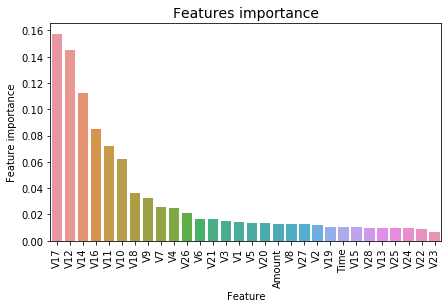

In [55]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

In [ ]:
print(classification_report(valid_df[target].values, preds))
print(confusion_matrix(valid_df[target].values, preds))

In [57]:
roc_auc_score(valid_df[target].values, preds)

0.8849736203439907

#### AdaBoostClassifier

In [62]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                         n_estimators=NUM_ESTIMATORS)
clf.fit(train_df[predictors], train_df[target].values)
preds = clf.predict(valid_df[predictors])

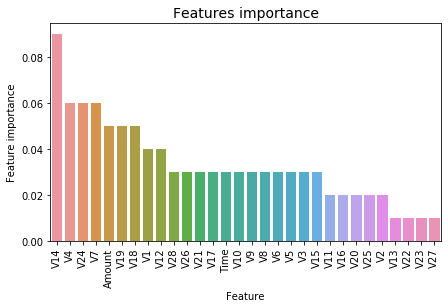

In [63]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

In [72]:
print(classification_report(valid_df[target].values, preds))
print(confusion_matrix(valid_df[target].values, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.85      0.71      0.77       100

    accuracy                           1.00     56962
   macro avg       0.92      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

[[56849    13]
 [   29    71]]


In [73]:
roc_auc_score(valid_df[target].values, preds)

0.8548856881572932

#### XGBoost

In [74]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [75]:
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.881225	valid-auc:0.864826
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.923093	valid-auc:0.919555
Stopping. Best iteration:
[15]	train-auc:0.921977	valid-auc:0.919716



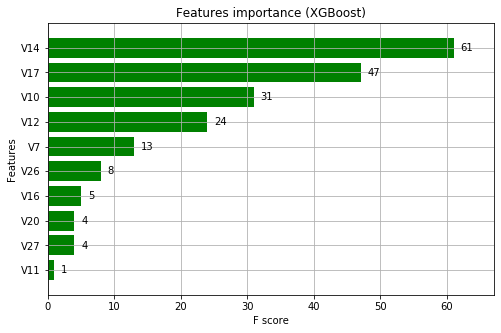

In [86]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [87]:
preds = model.predict(dtest)

In [88]:
roc_auc_score(test_df[target].values, preds)

0.9194555238999682

In [115]:
print(classification_report(test_df[target].values, np.where(preds > 0.5, 1, 0), target_names=['No Fraud', 'Fraud']))
print(confusion_matrix(test_df[target].values, np.where(preds > 0.5, 1, 0)))

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56862
       Fraud       0.84      0.69      0.76       100

    accuracy                           1.00     56962
   macro avg       0.92      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962

[[56849    13]
 [   31    69]]


In [108]:
kf = KFold(n_splits = 3, random_state = RANDOM_STATE, shuffle=True)

# Create arrays and dataframes to store results
oof_preds = np.zeros(train_df.shape[0])
confusion_matrix_dict = {}
n_fold = 0
for train_idx, valid_idx in kf.split(train_df):
    train_x, train_y = train_df[predictors].iloc[train_idx], train_df[target].iloc[train_idx]
    valid_x, valid_y = train_df[predictors].iloc[valid_idx], train_df[target].iloc[valid_idx]
    
    model =  LGBMClassifier(
                  nthread=-1,
                  n_estimators=2000,
                  learning_rate=0.01,
                  num_leaves=80,
                  colsample_bytree=0.98,
                  subsample=0.78,
                  reg_alpha=0.04,
                  reg_lambda=0.073,
                  subsample_for_bin=50,
                  boosting_type='gbdt',
                  is_unbalance=False,
                  min_split_gain=0.025,
                  min_child_weight=40,
                  min_child_samples=510,
                  objective='binary',
                  metric='auc',
                  silent=-1,
                  verbose=-1,
                  feval=None)
    model.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
                eval_metric= 'auc', verbose= VERBOSE_EVAL, early_stopping_rounds= EARLY_STOP)
    oof_preds[valid_idx] = model.predict_proba(valid_x, num_iteration=model.best_iteration_)[:, 1]
    
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
    del model, train_x, train_y, valid_x, valid_y
    n_fold = n_fold + 1
train_auc_score = roc_auc_score(train_df[target], oof_preds)
print('Full AUC score %.6f' % train_auc_score)                                    

Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.97367	valid_1's auc: 0.974513
[100]	training's auc: 0.977417	valid_1's auc: 0.976737
Early stopping, best iteration is:
[89]	training's auc: 0.976814	valid_1's auc: 0.977291
Fold  1 AUC : 0.977291
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.973656	valid_1's auc: 0.983813
[100]	training's auc: 0.972346	valid_1's auc: 0.988541
[150]	training's auc: 0.97398	valid_1's auc: 0.987389
Early stopping, best iteration is:
[103]	training's auc: 0.972533	valid_1's auc: 0.988767
Fold  2 AUC : 0.988767
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.980965	valid_1's auc: 0.959227
[100]	training's auc: 0.981041	valid_1's auc: 0.962586
Early stopping, best iteration is:
[85]	training's auc: 0.979771	valid_1's auc: 0.962699
Fold  3 AUC : 0.962699
Full AUC score 0.975436


### Neural Network

In [117]:
import tensorflow.keras as tfk
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

#### Under Sampling

In [120]:
X_train.shape

(756, 30)

In [121]:
n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])
undersample_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [122]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Train on 604 samples, validate on 152 samples
Epoch 1/20
604/604 - 1s - loss: 0.3844 - accuracy: 0.8593 - val_loss: 0.2967 - val_accuracy: 0.9276
Epoch 2/20
604/604 - 0s - loss: 0.2625 - accuracy: 0.9321 - val_loss: 0.2199 - val_accuracy: 0.9474
Epoch 3/20
604/604 - 0s - loss: 0.1946 - accuracy: 0.9421 - val_loss: 0.1750 - val_accuracy: 0.9474
Epoch 4/20
604/604 - 0s - loss: 0.1571 - accuracy: 0.9437 - val_loss: 0.1533 - val_accuracy: 0.9474
Epoch 5/20
604/604 - 0s - loss: 0.1363 - accuracy: 0.9487 - val_loss: 0.1413 - val_accuracy: 0.9474
Epoch 6/20
604/604 - 0s - loss: 0.1216 - accuracy: 0.9586 - val_loss: 0.1382 - val_accuracy: 0.9474
Epoch 7/20
604/604 - 0s - loss: 0.1107 - accuracy: 0.9603 - val_loss: 0.1379 - val_accuracy: 0.9474
Epoch 8/20
604/604 - 0s - loss: 0.1022 - accuracy: 0.9636 - val_loss: 0.1380 - val_accuracy: 0.9408
Epoch 9/20
604/604 - 0s - loss: 0.0945 - accuracy: 0.9652 - val_loss: 0.1445 - val_accuracy: 0.9408
Epoch 10/20
604/604 - 0s - loss: 0.0885 - accuracy: 0.

In [125]:
undersample_fraud_predictions = undersample_model.predict_classes(Xtest, batch_size=200, verbose=0)
undersample_fraud_predictions

In [129]:
undersample_cm = confusion_matrix(ytest, undersample_fraud_predictions)
undersample_cm

array([[54852,  2011],
       [    8,    90]])

#### SMOTE (Over sampling)

In [133]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_sample(Xtrain, ytrain)

In [135]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Train on 363923 samples, validate on 90981 samples
Epoch 1/20
363923/363923 - 3s - loss: 0.0683 - accuracy: 0.9736 - val_loss: 0.0264 - val_accuracy: 0.9927
Epoch 2/20
363923/363923 - 2s - loss: 0.0143 - accuracy: 0.9963 - val_loss: 0.0092 - val_accuracy: 0.9995
Epoch 3/20
363923/363923 - 2s - loss: 0.0073 - accuracy: 0.9985 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 4/20
363923/363923 - 2s - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.0032 - val_accuracy: 0.9998
Epoch 5/20
363923/363923 - 3s - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 6/20
363923/363923 - 2s - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 7/20
363923/363923 - 2s - loss: 0.0028 - accuracy: 0.9995 - val_loss: 9.7945e-04 - val_accuracy: 1.0000
Epoch 8/20
363923/363923 - 2s - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 9/20
363923/363923 - 2s - loss: 0.0021 - accuracy: 0.9996 - val_loss: 7.5734e-04 - val_accu

In [140]:
oversample_fraud_predictions = oversample_model.predict_classes(Xtest, batch_size=200, verbose=0)
oversample_smote_cm = confusion_matrix(ytest, oversample_fraud_predictions)
report = classification_report(ytest, oversample_fraud_predictions)

In [142]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.81      0.69      0.75        98

    accuracy                           1.00     56961
   macro avg       0.90      0.85      0.87     56961
weighted avg       1.00      1.00      1.00     56961



In [143]:
oversample_smote_cm

array([[56847,    16],
       [   30,    68]])